# #005 - Statistical Analysis for Multiple Stocks

On this code, we perform some statistical analisys, from data obtained from #004. 
Finaly we plot some graphics as correlation, scatterplots and histograms.

For future: automate lists to run any given stocks

Link to Seaborn Documentation: https://seaborn.pydata.org/

Install Libs.
    (remove comments '#' if need to install the libraries)

In [1]:
#    !pip install pandas
#    !pip install pandas-datareader
#    !pip install numpy
#    !pip install yfinance
#    !pip install datetime
#    !pip install plotly_express
#    !pip install seaborn
#    !pip install matplotlib

In [2]:
#import Libraries
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import yfinance as yf
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


### Define functions

In [3]:
# Function to scale stock prices based on their initial starting price
# The objective of this function is to set all prices to start at a value of 1 
def price_scaling(raw_prices_df):
    scaled_prices_df = raw_prices_df.copy()
    for i in raw_prices_df.columns[0:]:
          scaled_prices_df[i] = raw_prices_df[i]/raw_prices_df[i][0]
    return scaled_prices_df

In [4]:
# Define a function using Plotly Express
def plotly_data(df, title):  
    
    # Create figure
    fig = go.Figure()
   
    # Set title
    fig.update_layout(title_text = title) 
    
    # For loop that plots all stock prices in the pandas dataframe df
    
    for i in df.columns[0:]:
        # Add range slider
        #fig.update_layout(xaxis=dict(rangeselector = dict(buttons=list([dict(count=1, label="1m", step="month", stepmode="backward"), dict(count=6, label="6m", step="month", stepmode="backward"), dict(count=1, label="YTD", step="year", stepmode="todate"), dict(count=1, label="1y", step="year", stepmode="backward"), dict(step="all")])), rangeslider=dict( visible=True), type="date"))
        # Add line graph
        fig.add_scatter(x = df.index, y = df[i], name = i)
        # Update Layout
        fig.update_layout({'plot_bgcolor': "white"})
        #fig.update_traces(line_width = 3)
    
    fig.show()
    
# Define a function using Plotly Express, changes axis y to logarithm scale
def log_plotly_data(df, title):  
    
    # Create figure
    fig = go.Figure()
   
    # Set title
    fig.update_layout(title_text = title) 
    
    # For loop that plots all stock prices in the pandas dataframe df
    
    for i in df.columns[0:]:
        # Add range slider
        #fig.update_layout(xaxis=dict(rangeselector = dict(buttons=list([dict(count=1, label="1m", step="month", stepmode="backward"), dict(count=6, label="6m", step="month", stepmode="backward"), dict(count=1, label="YTD", step="year", stepmode="todate"), dict(count=1, label="1y", step="year", stepmode="backward"), dict(step="all")])), rangeslider=dict( visible=True), type="date"))
        # Add line graph
        fig.add_scatter(x = df.index, y = df[i], name = i)
        # Update Layout
        fig.update_layout({'plot_bgcolor': "white"})
    
    #changes y to logarithm scale
    fig.update_yaxes(type="log")
    fig.show()    

## 5.1 Import and Organize Data

In [5]:
# input stocks and organize into a List Object, 

tickers = [item for item in input("Enter the stock tickers, for portfolio (space them only) : ").split()]   
#   PETR4.SA VALE3.SA TAEE11.SA ITSA4.SA WEGE3.SA
#   AAPL AMZN GOOG META MSFT NVDA TSLA

yf.pdr_override()

# define a data range, 
end = dt.datetime.now()
start = end - dt.timedelta(days = 365*10)

In [6]:
#obtain data from YFinance
df = pdr.get_data_yahoo(tickers, start = start, end = end)
df

[*********************100%%**********************]  5 of 5 completed


Adj Close                                                 Close  \
            ITSA4.SA   PETR4.SA  TAEE11.SA   VALE3.SA   WEGE3.SA  ITSA4.SA   
Date                                                                         
2013-12-13  2.731166   5.514355   7.018179  18.959671   3.838048  4.872106   
2013-12-16  2.749787   5.552781   7.032985  19.087322   3.857827  4.905325   
2013-12-17  2.749787   5.379858   6.958955  19.020723   3.839284  4.905325   
2013-12-18  2.774617   5.392665   6.803486  19.076227   3.842347  4.949617   
2013-12-19  2.821170   5.523960   6.755369  19.486942   3.891928  5.032664   
...              ...        ...        ...        ...        ...       ...   
2023-12-04  9.740000  34.910000  36.419998  73.529999  34.759998  9.740000   
2023-12-05  9.830000  34.750000  36.540001  72.849998  35.299999  9.830000   
2023-12-06  9.650000  33.500000  36.310001  72.370003  35.389999  9.650000   
2023-12-07  9.730000  33.419998  35.970001  72.599998  35.360001  9.730000   
2023-12-08  9.860000  34.490002  36.099998  72.800003  34.650002  9.860000   

                                                        ...      Open  \
             PETR4.SA  TAEE11.SA   VALE3.SA   WEGE3.SA  ...  ITSA4.SA   
Date                                                    ...             
2013-12-13  17.219999  18.959999  34.160000   4.593195  ...  4.905325   
2013-12-16  17.340000  19.000000  34.389999   4.616863  ...  4.905325   
2013-12-17  16.799999  18.799999  34.270000   4.594674  ...  4.910861   
2013-12-18  16.840000  18.379999  34.369999   4.585798  ...  4.927471   
2013-12-19  17.250000  18.250000  35.110001   4.644970  ...  4.999445   
...               ...        ...        ...        ...  ...       ...   
2023-12-04  34.910000  36.419998  73.529999  34.759998  ...  9.740000   
2023-12-05  34.750000  36.540001  72.849998  35.299999  ...  9.740000   
2023-12-06  33.500000  36.310001  72.370003  35.389999  ...  9.850000   
2023-12-07  33.419998  35.970001  72.599998  35.360001  ...  9.670000   
2023-12-08  34.490002  36.099998  72.800003  34.650002  ...  9.730000   

                                                          Volume            \
             PETR4.SA  TAEE11.SA   VALE3.SA   WEGE3.SA  ITSA4.SA  PETR4.SA   
Date                                                                         
2013-12-13  16.990000  19.559999  35.000000   4.643491  20912908  28058000   
2013-12-16  17.250000  18.959999  34.330002   4.605029  41932564  32498700   
2013-12-17  17.209999  18.900000  34.169998   4.642011  20143648  29001000   
2013-12-18  16.950001  18.790001  34.570000   4.630177  31573463  22817200   
2013-12-19  17.120001  18.490000  34.799999   4.612426  21357775  17906300   
...               ...        ...        ...        ...       ...       ...   
2023-12-04  35.439999  36.490002  74.239998  34.349998  16317600  35601900   
2023-12-05  34.919998  36.419998  73.230003  34.770000  18909200  43234200   
2023-12-06  34.549999  36.540001  73.500000  35.430000  16421900  64179200   
2023-12-07  33.650002  36.310001  72.690002  35.480000  11717000  64723900   
2023-12-08  33.709999  35.970001  73.099998  35.360001  14434100  53290700   

                                          
            TAEE11.SA  VALE3.SA WEGE3.SA  
Date                                      
2013-12-13   503000.0   3723000  4235140  
2013-12-16   481400.0   2581400  3960684  
2013-12-17   533900.0   3032300  3617952  
2013-12-18   456000.0   5304800  2759432  
2013-12-19   626400.0   2753600  2430896  
...               ...       ...      ...  
2023-12-04  1030800.0  22402300  5514000  
2023-12-05  2456100.0  25179500  5143900  
2023-12-06   968900.0  20503900  5700700  
2023-12-07  1352600.0  17535800  4183000  
2023-12-08  1091000.0  16083200  5927600  

[2481 rows x 30 columns]

In [7]:
#select Ajusted Close Prices
Adj_Close_df = df['Adj Close']

#select Volume
volume_df = df['Volume']

#calculate percentage daily return
p_change_df = Adj_Close_df.pct_change() * 100
p_change_df.replace(np.nan, 0, inplace = True)

#Scale close prices
scaling_df = price_scaling(Adj_Close_df)
scaling_df

,ITSA4.SA,PETR4.SA,TAEE11.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2013-12-13,1.000000,1.000000,1.000000,1.000000,1.000000
2013-12-16,1.006818,1.006968,1.002110,1.006733,1.005154
2013-12-17,1.006818,0.975610,0.991561,1.003220,1.000322
2013-12-18,1.015909,0.977932,0.969409,1.006148,1.001120
2013-12-19,1.032954,1.001742,0.962553,1.027810,1.014038
...,...,...,...,...,...
2023-12-04,3.566242,6.330750,5.189380,3.878232,9.056688
2023-12-05,3.599195,6.301735,5.206479,3.842366,9.197385
2023-12-06,3.533289,6.075054,5.173707,3.817049,9.220834


### Verify null values ocurrence and analize data

In [8]:
Adj_Close_df.describe().round(2)

,ITSA4.SA,PETR4.SA,TAEE11.SA,VALE3.SA,WEGE3.SA
count,2481.00,2481.00,2480.00,2481.00,2481.00
mean,6.02,9.59,18.57,38.25,16.89
std,2.04,7.06,10.33,24.93,13.31
min,2.53,1.43,6.24,5.37,3.37
25%,3.83,4.84,9.36,16.92,5.58
50%,6.64,7.49,14.30,32.71,8.72
75%,7.72,10.85,30.10,64.16,31.87
max,9.86,37.09,38.88,92.17,44.15


In [9]:
p_change_df.describe().round(2)

,ITSA4.SA,PETR4.SA,TAEE11.SA,VALE3.SA,WEGE3.SA
count,2481.00,2481.00,2481.00,2481.00,2481.00
mean,0.07,0.12,0.08,0.09,0.11
std,1.90,3.14,1.48,2.78,2.09
min,-10.87,-29.70,-8.31,-24.56,-20.62
25%,-1.03,-1.47,-0.76,-1.41,-1.04
50%,0.00,0.10,0.04,0.02,0.03
75%,1.11,1.71,0.90,1.47,1.21
max,10.27,22.22,8.73,21.36,13.89


In [10]:
scaling_df.describe().round(2)

,ITSA4.SA,PETR4.SA,TAEE11.SA,VALE3.SA,WEGE3.SA
count,2481.00,2481.00,2480.00,2481.00,2481.00
mean,2.20,1.74,2.65,2.02,4.40
std,0.75,1.28,1.47,1.31,3.47
min,0.92,0.26,0.89,0.28,0.88
25%,1.40,0.88,1.33,0.89,1.45
50%,2.43,1.36,2.04,1.73,2.27
75%,2.83,1.97,4.29,3.38,8.30
max,3.61,6.73,5.54,4.86,11.50


## 5.2 Plotting Pair Data

In [11]:
#generate variables for stocks list
#need to copy the output and paste on next cell

i = range(len(tickers))
for n in i:
    j = p_change_df.iloc[:, n] 
    tk = tickers[n]
    print(tickers[n], '= p_change_df["{}"]'.format(tk))

PETR4.SA = p_change_df["PETR4.SA"]
VALE3.SA = p_change_df["VALE3.SA"]
TAEE11.SA = p_change_df["TAEE11.SA"]
ITSA4.SA = p_change_df["ITSA4.SA"]
WEGE3.SA = p_change_df["WEGE3.SA"]


In [12]:
# have to change this for every run

PETR = p_change_df["PETR4.SA"]
VALE = p_change_df["VALE3.SA"]
TAEE = p_change_df["TAEE11.SA"]
ITSA = p_change_df["ITSA4.SA"]
WEGE = p_change_df["WEGE3.SA"]

In [13]:
#Set Parameters

x = VALE
y = PETR
ulim = 5
dlim = - ulim

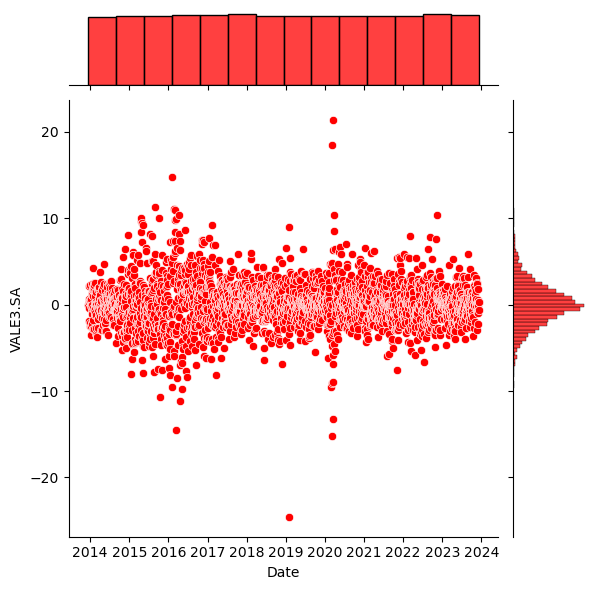

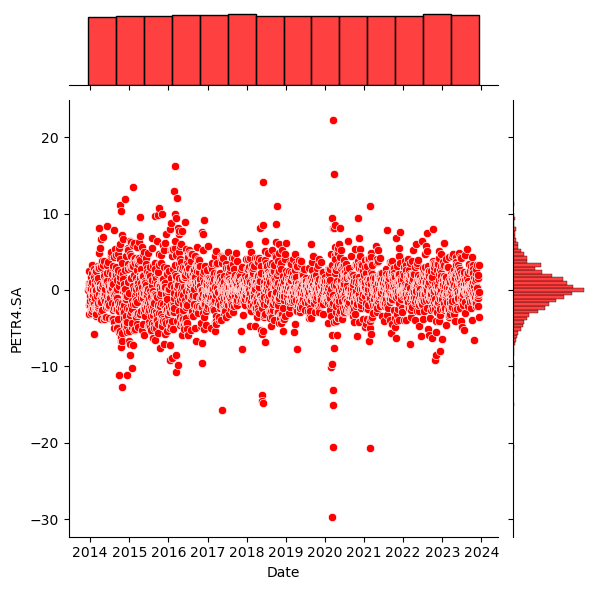

In [14]:
# a joinplot with percentage daily returns, date is constant 1 day
sns.jointplot(data=x, color = 'r', )
sns.jointplot(data=y, color = 'r', )

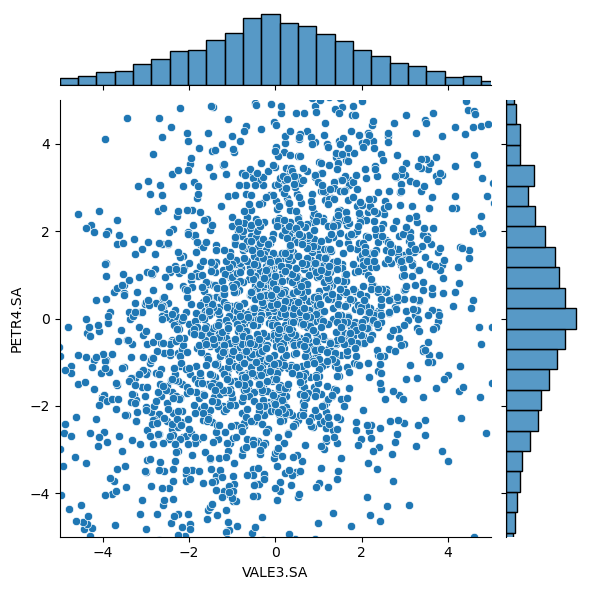

In [15]:
#joint 2 stocks into a scatter

sns.jointplot(x=x, y=y, xlim = {dlim, ulim}, ylim = {dlim, ulim})


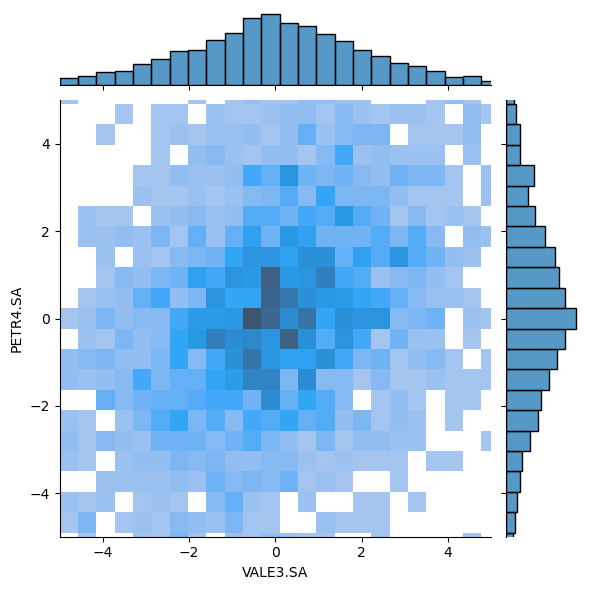

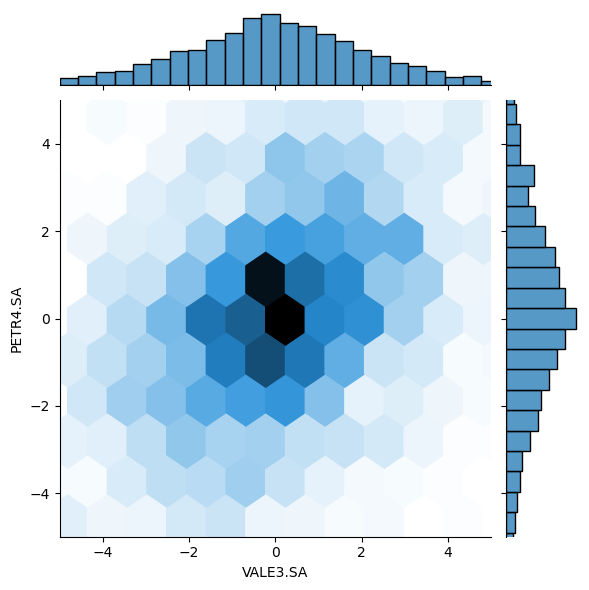

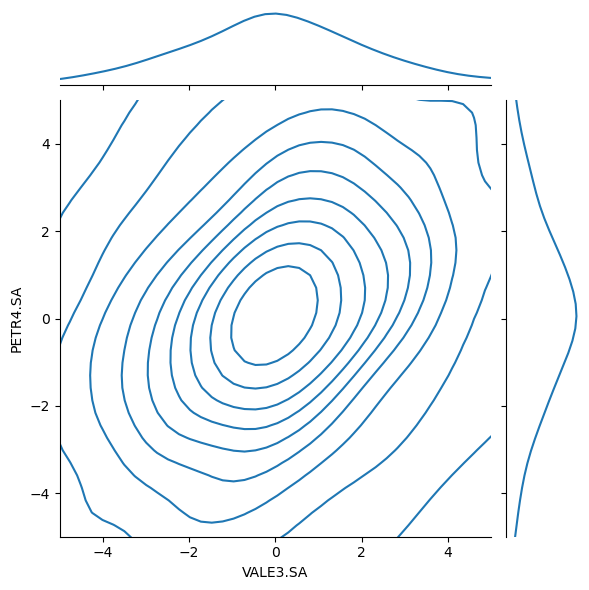

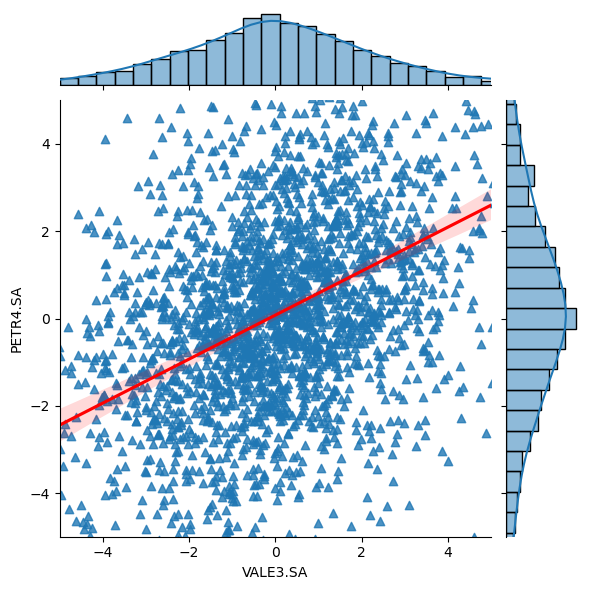

In [16]:
#Another plot types

sns.jointplot(x=x, y=y, kind="hist", xlim = {dlim, ulim}, ylim = {dlim, ulim})
sns.jointplot(x=x, y=y, kind="hex", xlim = {dlim, ulim}, ylim = {dlim, ulim})
sns.jointplot(x=x, y=y, kind="kde", xlim = {dlim, ulim}, ylim = {dlim, ulim})
sns.jointplot(x=x, y=y, kind="reg", line_kws=dict(color="r"), marker = "^", xlim = {dlim, ulim}, ylim = {dlim, ulim})

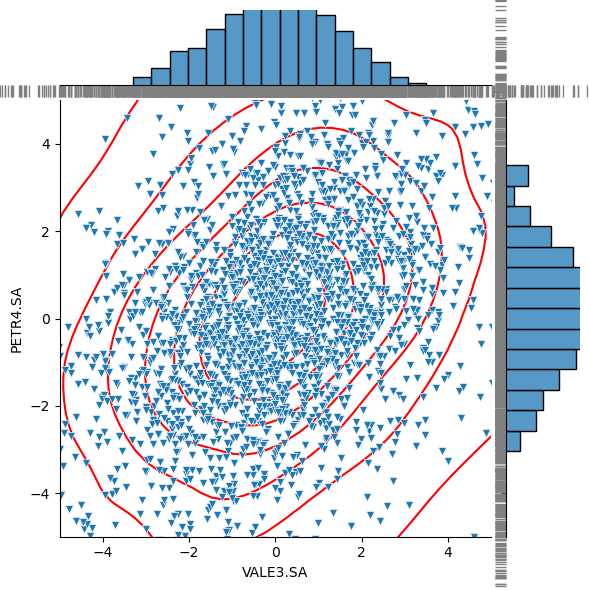

In [17]:
# Add more layers into the plot

g = sns.jointplot(x=x, y=y, marker = "v", xlim = {dlim, ulim}, ylim = {dlim, ulim})
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=8)
g.plot_marginals(sns.rugplot, color=".5", height=-.15, clip_on=False)


<Axes: xlabel='VALE3.SA', ylabel='PETR4.SA'>

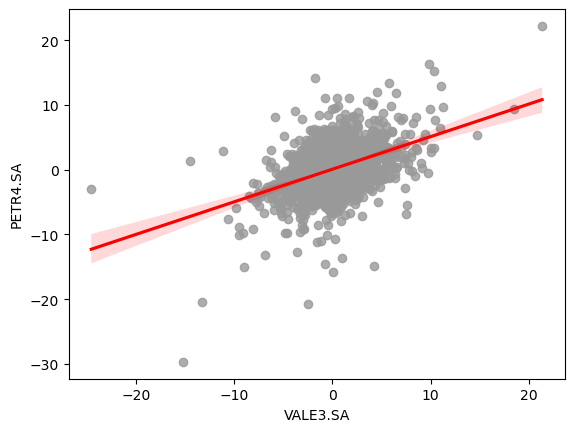

In [18]:
#perform a linear regression
    
sns.regplot(x=x, y=y
            # polinomial order to ajust regression
            , order = 1
            # confidence interval
            , ci=99
            #change color range saturation 0 black to 1 white
            , color=".6"
            # change color from regression line 'r' = red
            , line_kws=dict(color="r")
            # Fit a robust regression to downweight the influence of outliers
            #, robust=True
            
            )


## 5.3 Plot Entire Data Stocks

In [19]:
log_plotly_data(scaling_df, "Scaled Prices")

In [20]:
# Plot histograms for stocks daily returns using plotly express
fig = px.histogram(p_change_df)
fig.update_layout({'plot_bgcolor': "white"})

<Axes: >

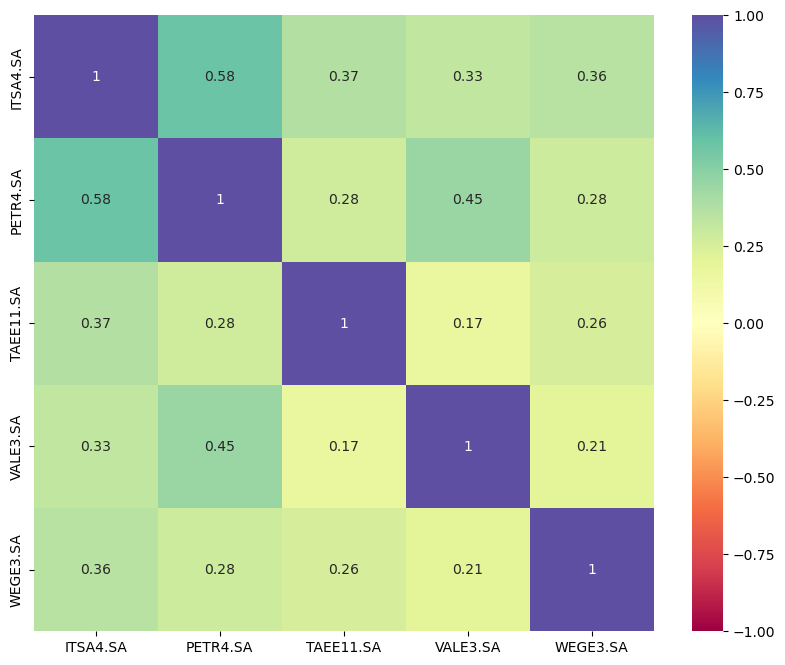

In [21]:
# Plot a heatmap showing the correlations between daily returns

plt.figure(figsize = (10, 8))
sns.heatmap(p_change_df.corr(), annot = True, vmin= -1, vmax= 1, cmap= "Spectral")

c:\Users\marqu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



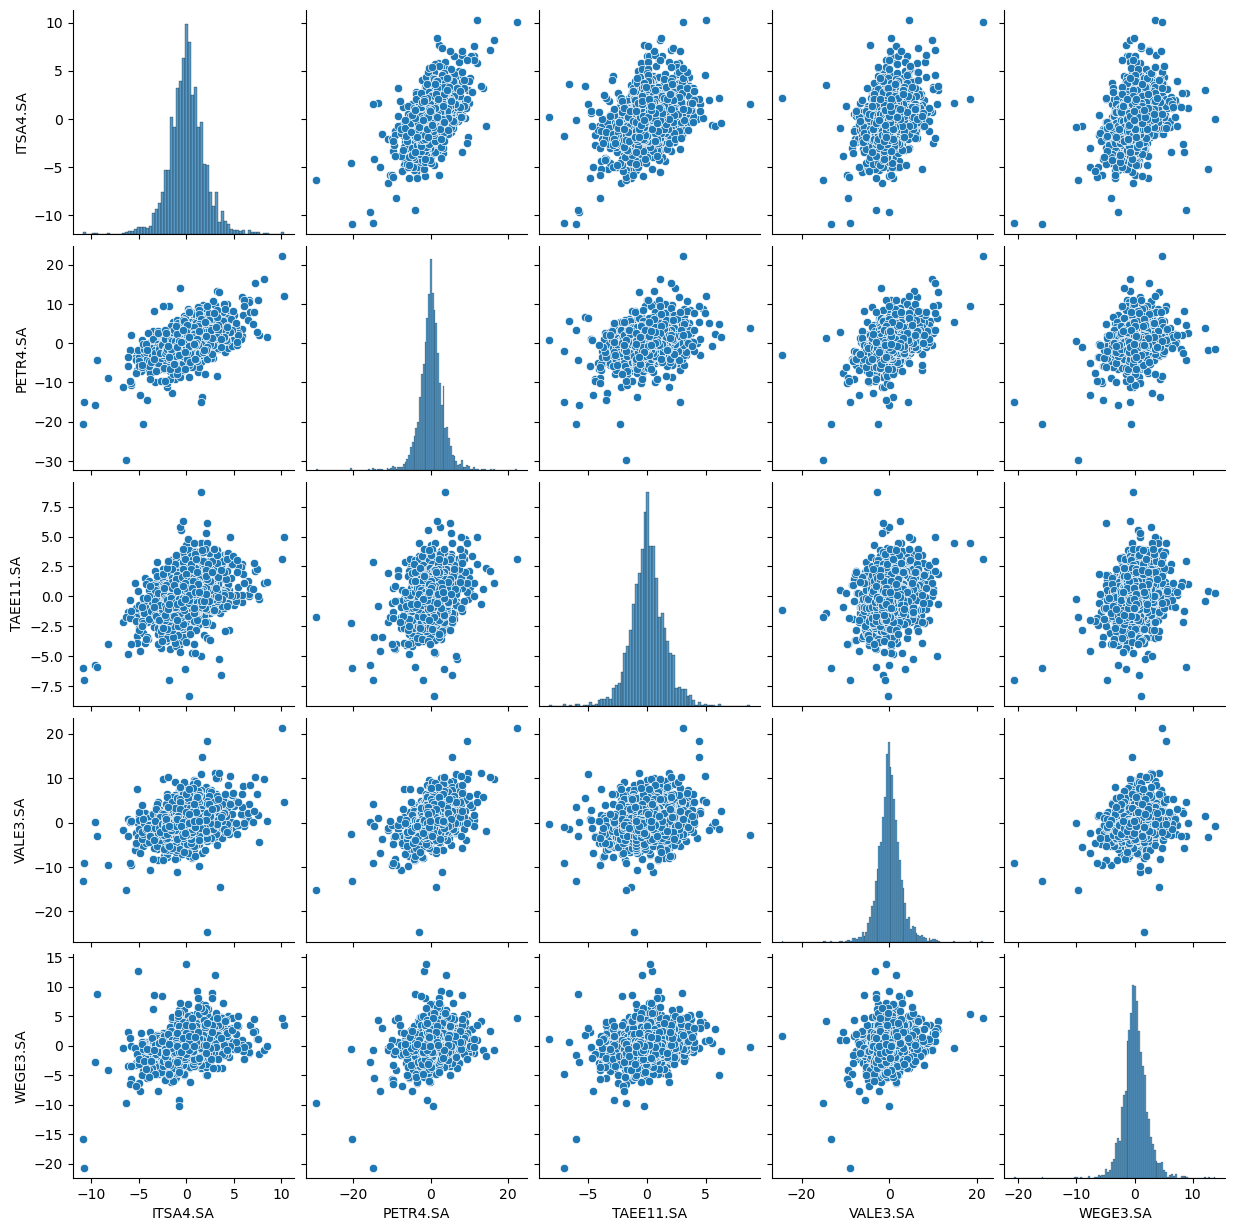

In [22]:
# Plot the Pairplot between stocks daily returns
sns.pairplot(p_change_df)

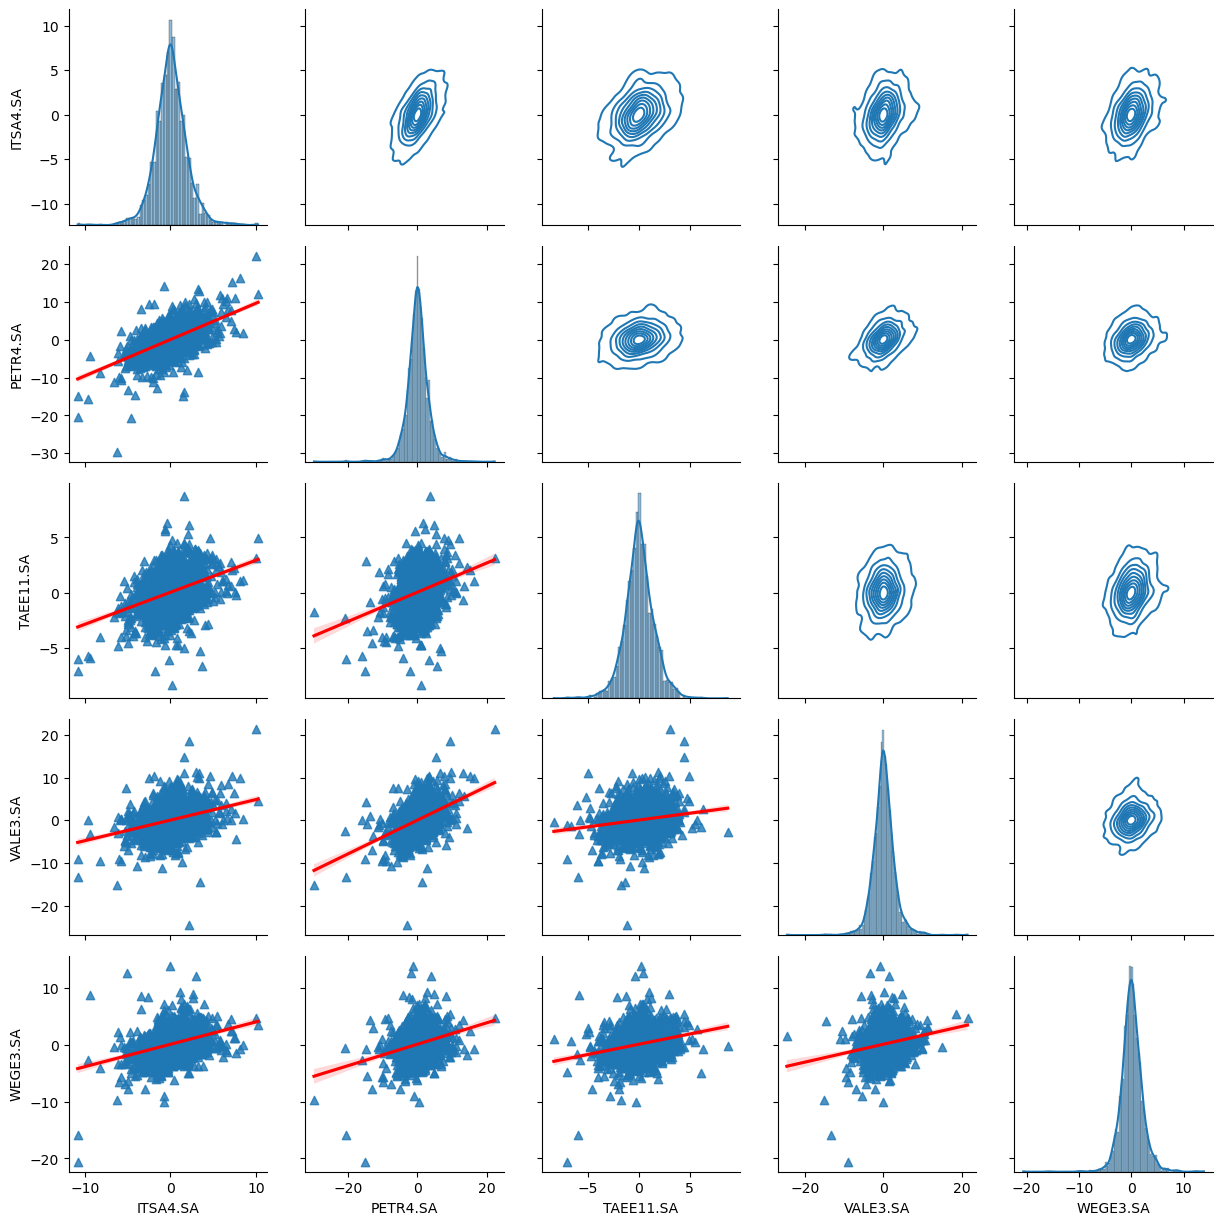

In [23]:

# Plot the Pairplot between stocks daily returns

g = sns.PairGrid(p_change_df, diag_sharey=False)
g.map_upper(sns.kdeplot)
g.map_lower(sns.regplot,line_kws=dict(color="r"), marker = "^")
g.map_diag(sns.histplot, kde=True, lw=2, )



## SNS info

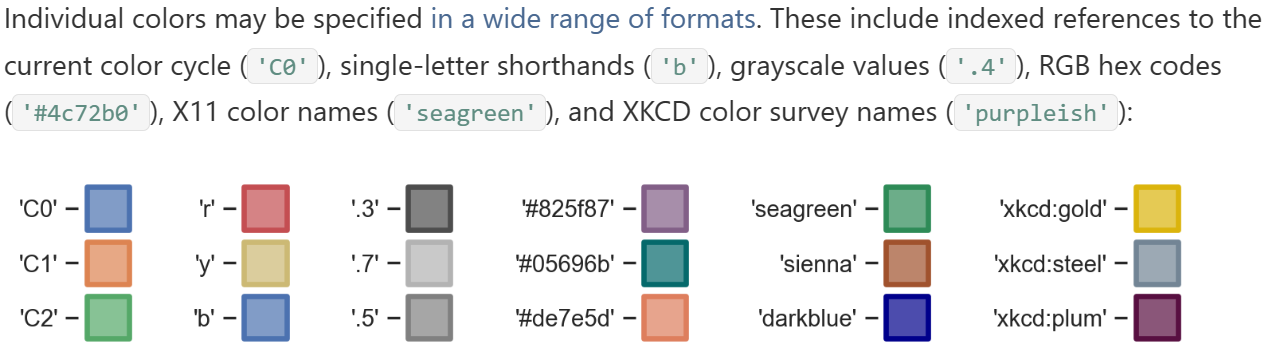
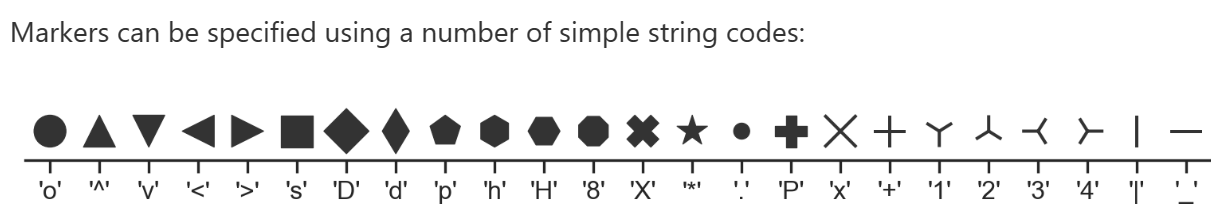

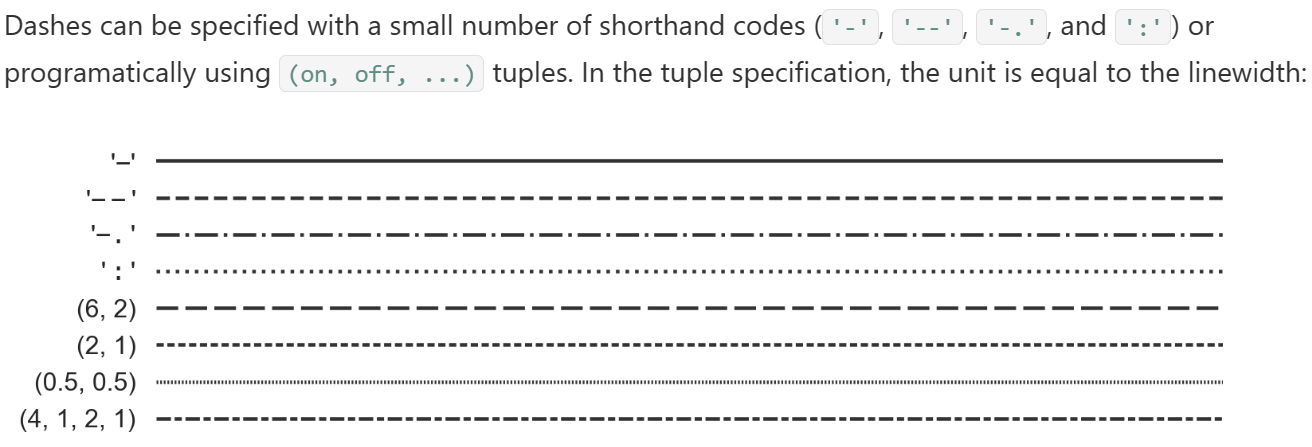

As with the convention in matplotlib, every continuous colormap has a reversed version, which has the suffix "_r":

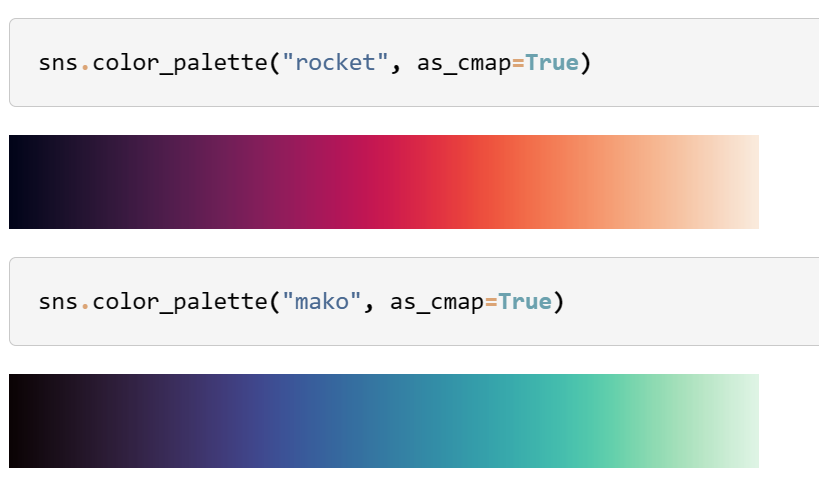
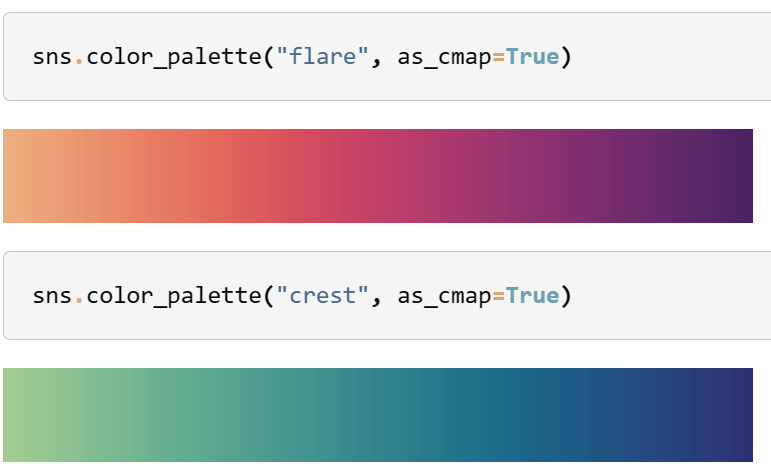
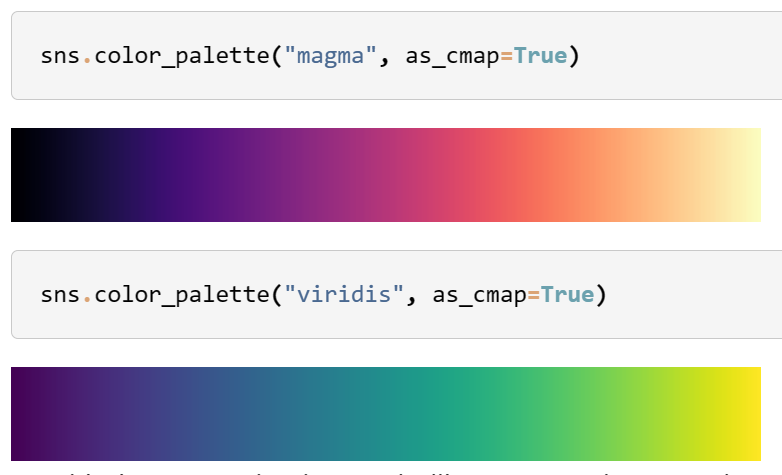